# PROJET 10H11 - Analyse de Sentiment

Voici un template pour l'import de fichier excel, la transformation en matrice de termes et l'application de différents modèle de machine learning.

Pour le bon fonctionnement du template vérifier que la base de donnée excel et la bibliotèque soient dans le même dossier que ce template.

# Installation des modules indispensables

In [0]:
# Enlever les # des lignes en dessous si ces modules ne sont pas encore installés sur votre ordinateur
# ! pip install unidecode
# ! pip install unicode


# Importer notre librairie

In [0]:
from SentimentAnalysisBibliotheque import *

[nltk_data] Downloading package punkt to /Users/mac.admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mac.admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importer notre dataframe et la transformer en matrice de termes

### Les dataframes générés avec le scraping contiennent au moins une colonne tweets

In [0]:
def main():
    # data_tweet_sncf.xlsx
    fichier = input("Quel est le nom complet de votre fichier au format excel : Attention à ne pas mettre de guillemets, exemple : data_tweet_sncf.xlsx . Votre réponse : " )
    users = input('Si vous disposez d\'une colonne \"users\" en plus de vos colonnes \"tweets\" et \"tonalité\" tapez oui sinon tapez non : ')
    pub = input('Si vous disposez d\'une colonne \"pub/presse\" en plus de vos colonnes \"tweets\" et \"tonalité\" tapez oui sinon tapez non  : ')
    
    if (users == "oui"):
        if (pub=="oui"):
            data_frame = pd.read_excel(fichier,usecols=["users","tweets",'tonalité',"pub/presse"])
            data_frame["All_tweets"] = data_frame["tweets"].copy()
            data_frame.rename(index=str, columns={"users": "Users", "tweets": "Tweets traités","tonalité":"Tonalité","pub/presse":"Pub"},inplace=True)
            users = data_frame["Users"].tolist()
        else:
            data_frame = pd.read_excel(fichier,usecols=["users","tweets",'tonalité'])
            data_frame["All_tweets"] = data_frame["tweets"].copy()
            data_frame.rename(index=str, columns={"users": "Users", "tweets": "Tweets traités","tonalité":"Tonalité"},inplace=True)
            users = data_frame["Users"].tolist() 
    else:
        if (pub=="oui"):
            data_frame = pd.read_excel(fichier,usecols=["tweets","tonalité","pub/presse"])
            data_frame["All_tweets"] = data_frame["tweets"].tolist()
            data_frame.rename(index=str, columns={"tweets": "Tweets traités","tonalité":"Tonalité","pub/presse":"Pub"},inplace=True)
        else:
            data_frame = pd.read_excel(fichier,usecols=["tweets","tonalité"])
            data_frame["All_tweets"] = data_frame["tweets"].tolist()
            data_frame.rename(index=str, columns={"tweets": "Tweets traités","tonalité":"Tonalité"},inplace=True)

    data_frame["Tweets traités"] = data_frame["Tweets traités"].str.lower()
    data_frame["Tweets traités"] = data_frame["Tweets traités"].astype(str)
    data_frame["Tweets traités"] = data_frame["Tweets traités"].apply(remove_url)
    data_frame["Tweets traités"] = data_frame["Tweets traités"].apply(filter_tab)
    data_frame["Tweets traités"] = data_frame["Tweets traités"].apply(remove_at)
    data_frame["Tweets traités"] = data_frame["Tweets traités"].apply(remove_ponctuation)
    data_frame["Tweets traités"] = data_frame["Tweets traités"].apply(remove_stop_words)
    data_frame["Tweets traités"] = data_frame["Tweets traités"].apply(remplace_accents)
    data_frame["Tweets traités"] = data_frame["Tweets traités"].apply(remove_ponctuation)
    
    list_of_words = word_occurency(data_frame)
    result = matrix_of_termes(data_frame,list_of_words)
    
    if (users == "non"):
        result["Users"] = users
    
    
    if(pub=="non"):
        result["Pub"]=0
        result["Pub"].loc[result[result["Tonalité"].isnull()].index.tolist()]=1
        result["Tonalité"]=result["Tonalité"].fillna("2")
        result["Tonalité"].replace(" ","2")
        cols = result.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        result = result[cols]
        
    if (pub =="oui"):
        result["Pub"] = result["Pub"].fillna("0")
    
    result["Tonalité"] = result["Tonalité"].astype(int)
    result["Pub"] = result["Pub"].astype(int)
  
    volontee = input("Voulez-vous télécharger le résultat au format csv ? : y / n : ")
    if (volontee == "y"):
        create_data_frame(result)    
    return(result)



In [0]:
if __name__ == '__main__':
    resultat = main()

Quel est le nom complet de votre fichier au format excel : Attention à ne pas mettre de guillemets, exemple : data_tweet_sncf.xlsx . Votre réponse : RATP_tweets.xlsx
Si vous disposez d'une colonne "users" en plus de vos colonnes "tweets" et "tonalité" tapez oui sinon tapez non : oui
Si vous disposez d'une colonne "pub/presse" en plus de vos colonnes "tweets" et "tonalité" tapez oui sinon tapez non  : oui
Voulez-vous télécharger le résultat au format csv ? : y / n : n


**Aperçu de la matrice de termes**

In [0]:
resultat

,Users,Tweets traités,Tonalité,Pub,All_tweets,ratp,les,a,bus,trafic,...,ends,barlou,disculper,roulette,h24,partit,musique,motivations,cnn,immaginaire
0,Croustiinette,effectivement ca passe entre trocadero charles...,2,0,@ClientsRATP @antoine_HD_ @eN_Drop @Ligne6_RAT...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PYEtienney,merci les pages site ratp claires faq permet r...,2,0,@ClientsRATP Merci. Mais les pages du site RAT...,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ligne9_RATP,tour haylen top,2,1,"Au tour de Haylen, au top 🥁 https://t.co/Krtxt...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LehutAnne,salut a groupe fait proselytisme religieux tra...,2,0,Salut @Ligne2_RATP il y a un groupe qui fait d...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ligne9_RATP,connaissez hugo barriol adore,2,1,Vous connaissez Hugo Barriol ? On adore ! 😍 ht...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,nbougeard,files partagees poids lourds ratp,2,0,@ParisEnVoiture et 👏 pas 👏 des 👏 files 👏 parta...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ligne9_RATP,parti shoefiti,2,1,C'est parti pour Shoefiti ! 🎧 https://t.co/vHB...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ClientsRATP,si bien ratp gerons titre transport appartient...,2,1,@PYEtienney Si vous êtes bien à la RATP. Mais ...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,veo_live,les derives islamistes plus tolerables notamme...,1,0,Les dérives islamistes ne sont plus tolérables...,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,AbanoRo,elles pourraient monter bus ratp,2,0,@29_suzane @gelleejeanluc Elles ne pourraient ...,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Répartition des tonalités**

In [0]:
tona = resultat.groupby(["Tonalité"]).count()
tona["Tweets traités"]
# 1: Négatif
# 2: Neutre
# 3: Positif

Tonalité
1    1489
2    3939
3     238
Name: Tweets traités, dtype: int64

# Importation des modèles 

In [0]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score


# Division du Dataset

Ici on drop la colonne **'Users'** car cette colonne est présente dans le fichier excel de base. Ceci n'est pas toujours le cas! Si cette colonne est absente, la supprimer de la ligne de code resultat.drop()

In [0]:
# En X nous prenons la matrice de termes uniquement.
X = resultat.drop(["Users", "Tweets traités", "Tonalité", "All_tweets"], axis = 1)
# En y nous prenons la Tonalité des tweets.
y = resultat["Tonalité"]

In [0]:
# Training set: 80%  Testing set: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Application des modèles 

**Decision Tree**

In [0]:
# DECISION TREE
print("Decision Tree")
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)

# Impression du score de précision
print("Le score de précision est de {} %".format(round((accuracy_score(y_test, y_pred)*100), 2)))
# Cross Validation Score
total_CV_scores= cross_val_score(dectree, X_train, y_train, cv=10)
dectree_score= score=total_CV_scores.mean()
print("Cross Validation Score: {} %".format(round(dectree_score*100, 2)))

# Répartition des tonalités
print("{} tweets négatifs.".format(np.count_nonzero(y_pred == 1)))
print("{} tweets neutres.".format(np.count_nonzero(y_pred == 2))) 
print("{} tweets positifs.".format(np.count_nonzero(y_pred == 3)))

Decision Tree
Le score de précision est de 77.34 %
Cross Validation Score: 73.59 %
272 tweets négatifs.
816 tweets neutres.
46 tweets positifs.


**Random Forest**

In [0]:
# RANDOM FOREST
print("Random Forest")
forest = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

# Impression du score de précision
print("Le score de précision est de {} %".format(round((accuracy_score(y_test, y_pred)*100), 2)))
# Cross Validation Score
total_CV_scores= cross_val_score(forest, X_train, y_train, cv=10)
forest_score=total_CV_scores.mean()
print("Cross Validation Score: {} %".format(round(forest_score*100, 2)))

# Répartition des tonalités
print("{} tweets négatifs.".format(np.count_nonzero(y_pred == 1)))
print("{} tweets neutres.".format(np.count_nonzero(y_pred == 2))) 
print("{} tweets positifs.".format(np.count_nonzero(y_pred == 3)))

Random Forest
Le score de précision est de 77.6 %
Cross Validation Score: 75.2 %
136 tweets négatifs.
977 tweets neutres.
21 tweets positifs.


**Bagging Classifier**

In [0]:
# BAGGING CLASSIFIER
print("Bagging Classifier")
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

# Impression du score de précision
print("Le score de précision est de {} %".format(round((accuracy_score(y_test, y_pred)*100), 2)))

# Cross Validation Score
total_CV_scores= cross_val_score(bag, X_train, y_train, cv=10)
bag_score=total_CV_scores.mean() 
print("Cross Validation Score: {} %".format(round(bag_score*100, 2)))

# Répartition des tonalités
print("{} tweets négatifs.".format(np.count_nonzero(y_pred == 1)))
print("{} tweets neutres.".format(np.count_nonzero(y_pred == 2))) 
print("{} tweets positifs.".format(np.count_nonzero(y_pred == 3)))

Bagging Classifier
Le score de précision est de 78.57 %
Cross Validation Score: 76.02 %
279 tweets négatifs.
828 tweets neutres.
27 tweets positifs.


**Adaptive Boosting**

In [0]:
# ADABOOST
print("Adaptive Boosting aka Adaboost")
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

# Impression du score de précision
print("Le score de précision est de {} %".format(round((accuracy_score(y_test, y_pred)*100), 2)))

# Cross Validation Score
total_CV_scores= cross_val_score(ada, X_train, y_train, cv=10)
ada_score=total_CV_scores.mean()
print("Cross Validation Score: {} %".format(round(ada_score*100, 2)))

# Répartition des tonalités
print("{} tweets négatifs.".format(np.count_nonzero(y_pred == 1)))
print("{} tweets neutres.".format(np.count_nonzero(y_pred == 2))) 
print("{} tweets positifs.".format(np.count_nonzero(y_pred == 3)))

Adaptive Boosting aka Adaboost
Le score de précision est de 72.4 %
Cross Validation Score: 72.11 %
238 tweets négatifs.
866 tweets neutres.
30 tweets positifs.


**Gradient Boosting** 

In [0]:
# GRADIENT BOOSTING 
print("Gradient Boosting")
gbo = GradientBoostingClassifier(n_estimators=100)
gbo.fit(X_train, y_train)
y_pred = gbo.predict(X_test)

# Impression du score de précision
print("Le score de précision est de {} %".format(round((accuracy_score(y_test, y_pred)*100), 2)))

# Cross Validation Score
total_CV_scores= cross_val_score(gbo, X_train, y_train, cv=10)
gbo_score=total_CV_scores.mean()
print("Cross Validation Score: {} %".format(round(gbo_score*100, 2)))

# Répartition des tonalités
print("{} tweets négatifs.".format(np.count_nonzero(y_pred == 1)))
print("{} tweets neutres.".format(np.count_nonzero(y_pred == 2))) 
print("{} tweets positifs.".format(np.count_nonzero(y_pred == 3)))

Gradient Boosting
Le score de précision est de 76.63 %
Cross Validation Score: 75.82 %
172 tweets négatifs.
937 tweets neutres.
25 tweets positifs.


**Support Vector Machine**

In [0]:
# SUPPORT VECTOR MACHINE
print("Support Vector Machine")

svm=LinearSVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Impression du score de précision
print("Le score de précision est de {} %".format(round((accuracy_score(y_test, y_pred)*100), 2)))

# Cross Validation Score
total_CV_scores= cross_val_score(svm, X, y, cv=10)
svm_score=total_CV_scores.mean()
print("Cross Validation Score: {} %".format(round(svm_score*100, 2)))

# Répartition des tonalités
print("{} tweets négatifs.".format(np.count_nonzero(y_pred == 1)))
print("{} tweets neutres.".format(np.count_nonzero(y_pred == 2))) 
print("{} tweets positifs.".format(np.count_nonzero(y_pred == 3)))

Support Vector Machine
Le score de précision est de 78.84 %
Cross Validation Score: 76.26 %
258 tweets négatifs.
838 tweets neutres.
38 tweets positifs.


**Naive Bayes**

In [0]:
# NAIVE BAYES
print("Naive Bayes")
naive = naive_bayes.MultinomialNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

# Impression du score de précision
print("Le score de précision est de {} %".format(round((accuracy_score(y_test, y_pred)*100), 2)))

# Cross Validation Score
total_CV_scores= cross_val_score(naive, X, y, cv=10)
naive_score=total_CV_scores.mean()
print("Cross Validation Score: {} %".format(round(naive_score*100, 2)))

# Répartition des tonalités
print("{} tweets négatifs.".format(np.count_nonzero(y_pred == 1)))
print("{} tweets neutres.".format(np.count_nonzero(y_pred == 2))) 
print("{} tweets positifs.".format(np.count_nonzero(y_pred == 3)))

Naive Bayes
Le score de précision est de 77.16 %
Cross Validation Score: 73.38 %
397 tweets négatifs.
732 tweets neutres.
5 tweets positifs.


# Récapitulatif des scores

In [ ]:
print("Decision Tree: {}%".format(round(dectree_score*100, 2)))
print("Random Forest: {}%".format(round(forest_score*100, 2)))
print("Bagging Classifier: {}%".format(round(bag_score*100, 2)))
print("Adaptive Boosting: {}%".format(round(ada_score*100, 2)))
print("Gradient Boosting: {}%".format(round(gbo_score*100, 2)))
print("Support Vector Machine: {}%".format(round(svm_score*100, 2)))
print("Naive Bayes: {}%".format(round(naive_score*100, 2)))

# Pour aller plus loin : hyperparamétrage des modèles

## trouver les paramètres optimaux pour un modèle donné : option sans cross validation

on teste à la main plusieurs valeurs d'un paramètre et on compare les scores

Text(0, 0.5, 'accuracy')

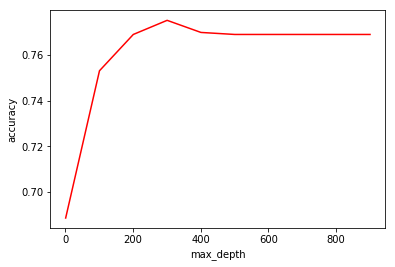

In [0]:
# par exemple ici, on teste plusieurs valeurs possibles pour le paramètre max_depth du modèle Random Forest

accuracy_test=[]
n_estimators=[]
for i in range(1,1000,100):
  clf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)  #on peut fixer d'autres paramètres du modèle comme ici n_estimators ou les laisser en valeur par défaut
  clf.fit(X_train, y_train)
  y_predict=clf.predict(X_test)
  accuracy_test.append(accuracy_score(y_test, y_predict))
  n_estimators.append(i)

  
import matplotlib.pyplot as plt
plt.plot(n_estimators, accuracy_test,'r')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

## trouver les paramètres optimaux pour un modèle donné : option automatisée avec cross validation

### méthode GRIDSEARCH CV : va tester toutes les combinaisons possibles pour chaque valeur de chaque paramètre. Chaque combinaison de paramètres est testée via une cross validation (3 validations par défaut)

In [0]:
#  ici on va tester 2 paramètres avec 2 valeurs pour le premier et 5 valeurs pour le 2ème (donc 10 combinaisons à tester, chacune ayant 3 runs)
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    RandomForestClassifier(), {'n_estimators':[100,200], 'max_depth': [20, 50, 100, 400,800]}) #on peut changer le nombre de tests par combinaison avec cv= (cv=5 : chaque combinaison testée 5 fois)
grid.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

Text(0, 0.5, 'mean_test_score')

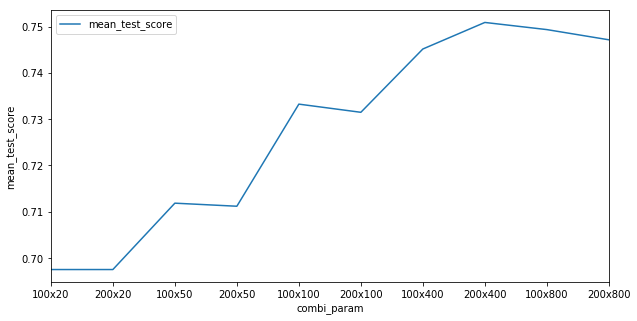

In [0]:
#si on souhaite charter les résultats
grid_result = pd.DataFrame(grid.cv_results_)
grid_result["n_estimators"] = grid_result.params.apply(lambda x: x["n_estimators"])
grid_result["max_depth"] = grid_result.params.apply(lambda x: x["max_depth"])
grid_result["combi_param"]=grid_result["n_estimators"].astype(str)+"x"+grid_result["max_depth"].astype(str)

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot()
grid_result.set_index("combi_param")[["mean_test_score"]].plot(ax=ax)
ax.set_xlabel("combi_param")
ax.set_ylabel("mean_test_score")

In [0]:
# pour isoler la combinaison de paramètres qui a donné le meilleur score :
grid. best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=400, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### estimer une fourchette pour chaque paramètre avec RANDOMIZED SEARCH CV

In [2]:
# il faut d'abord créer la grille de paramètres : on affecte à chaque paramètre une liste de valeurs possibles


from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 50], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
# ensuite on utilise cette grille pour cerner un peu mieux les best values des hyperparamètres (prend aléatoirement n_iter combinaisons de valeur et les test en CV)

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


"""
TROP LONG A TOURNER, je n'ai pas pu le tester. à essayer avec moins de valeurs peut-être
"""